Math087 - Mathematical Modeling
===============================
[Tufts University](http://www.tufts.edu) -- [Department of Math](http://math.tufts.edu)  
[Arkadz Kirshtein](https://math.tufts.edu/people/facultyKirshtein.htm) <arkadz.kirshtein@tufts.edu>   
*Fall 2023*

*Based on materials created by James Adler and George McNinch*

Course material (Class 4): More general optimization, and Linear Programming 
---------------------------------------------------------------------------

In [1]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)


## Multivariable optimization with constraints


### Formulation

So far we have been looking at various optimization problems, but only
of very specific types.  Optimization is clearly important and so we’d
like to describe some general form to help us tackle more problems.

So let’s describe what is more-or-less the most general form of an
optimization problem:

Consider an $\mathbf{R}$-valued function $f$ defined for
$\mathbf{x} \in \mathbf{R}^n$ -- thus, $f:\mathbf{R}^n \to
\mathbf{R}$.  We want to optimize $f(\mathbf{x})$ subject to a
system of *constraints* defined by some auxiliary data.

We first consider $E$ constraints defined for $1 \le i \le E$
by functions $g_i:\mathbf{R}^n \to \mathbf{R}$ together with values
$b_i \in \mathbf{R}$; these constraints
have the form $$(\heartsuit)_i \quad g_i(\mathbf{x}) \le b_i $$

At the same time, we consider $F$ constraints defined for $1 \le
j \le F$ by functions $h_j:\mathbf{R}^n \to \mathbf{R}$ together
with values $c_j \in \mathbf{R}$; these constraints have the form
$$ (\clubsuit)_j \quad h_j(\mathbf{x}) = c_j $$

Re-capping, the problem is to find the optimal value of $f(\mathbf{x})$ where
$\mathbf{x}$ ranges over all points in $\mathbf{R}^n$ satisfying
the constraints $(\heartsuit)_i$ and all constraints $(\clubsuit)_j$.

Compactly, a *general optimization problem* asks to find the maximum (or minimum) of $f:\mathbf{R}^n \to \mathbf{R}$ for $\mathbf{x} \in \mathbf{R}^n$ subject to
constraints
$$\begin{aligned} g_i(\mathbf{x}) & \le b_i & 1 \le i \le E \\
                   h_j(\mathbf{x}) & = c_j & 1 \le j \le F
   \end{aligned} $$
For functions $g_i,h_j:\mathbf{R}^n \to \mathbf{R}$ and scalars $b_i,c_j$.

Remarks
-------
- One might wonder why we don't consider constraints of the form
$$\ell(\mathbf{x}) < d \quad \text{or} \quad
   \ell(\mathbf{x}) \ge d \quad \text{or} \quad
   \ell(\mathbf{x}) > d$$ 
The answer is that the conditions imposed by constraints of these form can be achieved by using (possibly more) constraints of the forms $(\heartsuit)_i$ or $(\clubsuit)_j$.

- Our older examples all (essentially) have this form: 

  - For example, single-variable optimization amounts to the case $n =1$ - i.e. $f$ is a function $\mathbf{R} \to \mathbf{R}$. Typically we optimize on an interval -- for example we might want to optimize $f$ for $x$ in the closed interval $[a,b]$. Then one of the constraints has the form $x \le b$ (so this constraint has the form $(\heartsuit)$, $g_1$ is just the identity function, and $b_1 = b$) and the constraint $a \le x$ also has the form
$(\heartsuit)$, $g_2(x) = -x$, and $b_2 = -a$).
  
  - The Lagrange multiplier optimization examples that we've seen amount to the case of a single constraint of type $(\clubsuit)$.

## A "linear" example: Carpenter; tables; shelves

*This example is an instance of a problem in "linear programming", as we'll describe below.*

> A carpenter can choose to make either tables or bookshelves. She makes a profit of \\$25 per constructed table and \\$30 per constructed bookshelf (demand is sufficient that all constructed products will be sold). 

> It takes 5 hours of labor and 20 board-feet of lumber to make a table and 4 hours of labor and 30 board-feet of lumber to make a bookshelf. If she has access to 120 hours of labor and 690 board-feet of lumber each week, how many tables and how many bookshelves should she make to maximize profit? 


What are the variables?
- $t$ = # of tables made per week
- $b$ = # of bookshelves made per week
- $p$ = profit per week
- $L$ = hours of labor per week
- $W$ = board-feet of lumber used per week

What do we know?
- $p = 25t + 30b$
- $L = 5t + 4b$
- $W = 20t + 30b$

So the **goal** is to maximize $p(t, b) = 25t + 30b$, subject to the constraints
$$(\heartsuit) \quad \left \{ \begin{matrix}
L(t,b) = 5t + 4b &  \le 120 \\
W(t,b) = 20t + 30b & \le 690  \\
t & \ge 0 \\
b & \ge 0 \\
\end{matrix} \right.$$

It would be useful to have a schematic showing the region of the plane consting of those points $(t,b)$ which satisfy the constraint $(\heartsuit)$. This set of points is known as the **feasible set**
or **feasible region**.

Let's start by using ``matplotlib`` to draw a representation of this feasible region.

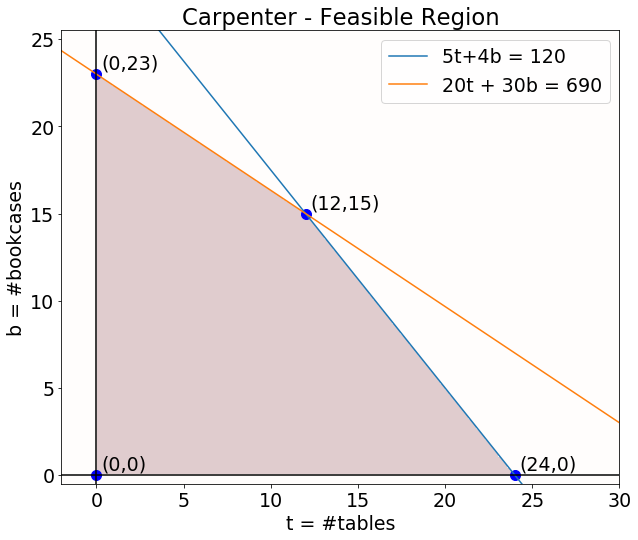

In [2]:
hide_code_in_slideshow()
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 19})

# plot the feasible region
d = np.linspace(-2,30,500)
t,b = np.meshgrid(d,d)

#fig,ax = plt.subplots(figsize=(20,10))
pl=plt.figure(figsize=(10,10))
ax = plt.axes()

ax.imshow(((t>=0) & (b>=0) & (5*t + 4*b <= 120) & (20*t + 30*b <= 690)).astype(int),
          extent=(t.min(),t.max(),b.min(),b.max()),
          origin="lower", 
          cmap="Reds", 
          alpha = 0.2)

# plot the lines defining the constraints
t = np.linspace(-2,30,500)

ax.plot(t, (120 - 5*t)/4, label="5t+4b = 120")
ax.plot(t, (690 - 20*t)/30, label = "20t + 30b = 690")
ax.axhline(y=0, color = "black")
ax.axvline(x=0, color = "black")
ax.set_ylim(ymin=-0.5, ymax=25.5)

ax.legend()
ax.set_title("Carpenter - Feasible Region")
ax.set_xlabel("t = #tables")
ax.set_ylabel("b = #bookcases")

def ann_pt(x,y):
    s = f"({x},{y})"
    ax.annotate(s,xy=(x,y),xytext=(5,5),textcoords='offset points')

ax.scatter(0, 23,s=100,color="blue")
ax.scatter(12,15,s=100,color="blue")
ax.scatter(24, 0,s=100,color="blue")
ax.scatter(0,  0,s=100,color="blue")
ann_pt(0,23)
ann_pt(12,15)
ann_pt(24,0)
ann_pt(0,0)

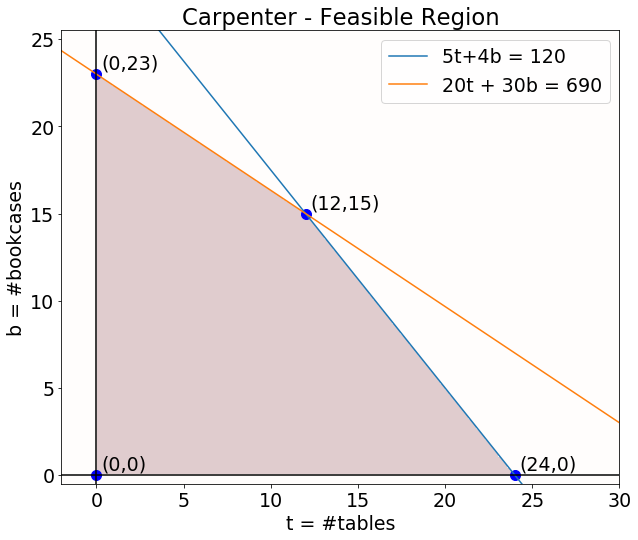

In [3]:
pl

The shaded region is the *feasible region* defined by the constraints $(\heartsuit)$ above. This region is bounded by (parts of) the graphs of the 4 linear equations: $$b=0, \quad t=0, \quad 5t+4b=120, \quad 20t + 30b = 690.$$

We've indicated the points of intersection of these lines.

Recall that we are trying to maximize the profit function $p(t,b)=25 t+30b$
for points in this feasible region. Notice
that 
$$\dfrac{\partial p}{\partial t} = 25 \quad \text{and} \quad 
\dfrac{\partial p}{\partial b} = 30,$$
so the profit function *has no critical points at all*. So the maximum will occur
on the **boundary** of the feasible region.



But the boundary itself is made up of line segments. And on each line segment, the restriction of $p$ is again a linear function. For example, on the line 
$5t+4b=120$, the profit is given as a function of $t$ by
$$p_1(t) = p(t,b(t)) = p\left(t,\dfrac{120-5t}{4}\right) = 25 t + \dfrac{30}{4}(120-5t).$$
Since $\dfrac{dp_1}{dt} = \dfrac{-50}{4}$, again $p_1$ has no critical points; its max on the boundary line segment will occur at one of the endpoints.

In this manner, we see that *the maximum value of $p$ must occur at one of the itersection points* of boundary lines defining the feasible region, i.e. at one of the points
$$(0,0), \quad (0,23), \quad (24,0), \quad \text{or} \quad (12,15).$$
We find:
$$p(0, 0) = 0, \quad p(24, 0) = 600, \quad p(0, 23) = 690, \quad p(12, 15) = 750$$
So her profit is maximized by producing 12 tables and 15 bookshelves.




## Linear Programming

The term *linear programming* refers to optimization problems in which
the function to be optimized, as well as all of the constraint equations, are *linear* functions of the variables.

The strategy used to find the optimal value in the carepentry example was pretty good! It works well if we only have a few constraints and a few variables. But if we have **many variables and many constraints**, we find **a lot** of vertices in high dimensions. 

For example, let’s assume given a linear function of 50 variables, and 150 linear constraints (including the conditions that all 50 variables are non-negative). With 50 variables, we expect a point to be specified by exactly 50 linear equations. So we expect a point of intersection of our boundary equations to be determined by selecting 50 of the 150 possible equations. The number of possible ways of choosing 50 items from 150 possible items is the [binomial coefficient](https://en.wikipedia.org/wiki/Binomial_coefficient)  $\dbinom{150}{50}$ (read this symbols as "150 choose 50"). 

Recall that $$\dbinom{n}{m} = \dfrac{n!}{m!\cdot (n-m)!}$$

(where $n!$ means "$n$ factorial", a quantity that e.g. you met in Calc II when studying Taylor Series...)

In [4]:
import math
def binom(n,m):
    return math.factorial(n)/(math.factorial(m)*math.factorial(n-m))*1e0
    
binom(150,50)

2.0128660909731933e+40

So the number of intersection points is approximately:
$$\dbinom{150}{50} = \dfrac{150!}{100!\cdot 50!} \approx 2 \times 10^{40}.$$

Notice that in our carpentry example, there are two variables, and the boundary is defined by 4 equations. Our estimate predicts $\dbinom{4}{2} = 6$ intersection points, but of course only 4 of these points are actually on the boundary. You can see the location of the "extra" two points in the image above -- they are on the coordinate axes. Nevertheless, for large numbers of variables and equations, $\dbinom{n}{m}$ is a  decent estimate for the number of relevant intersection points.


There are roughly $3 \times 10^7$ seconds in a year, so
a computer that can evaluate the function at a pair $(t,b)$ at a rate of once per nanosecond ($10^{-9}$ seconds) would take 

\\begin{aligned}
\approx & \left(2 \times 10^{40} \text{operations} \right)\cdot \left (10^{-9} \dfrac{\text{seconds}}{\text{operation}} \right)\cdot \left(\dfrac{1}{3 \times 10^7} \dfrac{\text{years}}{\text{second}}\right)&  \\ = & \left( \dfrac{2}{3} \times 10^{24} \right) =
6.\overline{66} \times 10^{23} \quad \text{years} &
\end{aligned}
-- i.e. more than $6 × 10^{23}$ years to complete the task.

Rather than wait so long, we are going to study an algorithm that permits us to ignore some of the vertices.

## Linear programming -- some preliminaries

Let's take a moment and describe linear programming problems using notation from *linear algebra*.
If there are $n$ variables $x_i$, we write
$\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} \in \mathbf{R}^n$
for the corresponding "variable vector".

More generally, we denote by $\mathbf{R}^{m \times n}$ the space of $m \times n$ matrices -- i.e. matrices with $m$ rows and $n$ columns; thus
$$\mathbf{R}^{m \times n} = \left \{ 
    \begin{pmatrix} 
      a_{11} & a_{12} & \cdots & a_{1n} \\
      a_{21} & a_{22} & \cdots & a_{2n} \\
      \vdots & \vdots & \ddots & \vdots \\
      a_{m1} & a_{m2} & \cdots & a_{mn} \\
    \end{pmatrix} \ \bigg \vert\ a_{ij} \in \mathbf{R} \right \} $$

Now, a linear function $\mathbf{R}^n \to \mathbf{R}$ is given by a $1 \times n$ matrix -- i.e. a row vector
$$\mathbf{c} = \begin{bmatrix} c_1 & c_2 & \cdots & c_n\end{bmatrix} \in \mathbf{R}^{1 \times n}.$$

We will usually reserve the symbol $\mathbf{R}^n$ to indicate the space $\mathbf{R}^{n \times 1}$ of **column vectors**; of course, we can view the row vector $\mathbf{c}$ as the **transpose** of a column vector, if convenient.

The value of the linear function $\mathbf{R}^n \to \mathbf{R}$ determined by $\mathbf{c}$ is given for $\mathbf{x} \in \mathbf{R}^n$ by the rule $$\mathbf{x} \mapsto \mathbf{c} \cdot \mathbf{x} = \sum_{i=1}^n c_i x_i$$ where $\mathbf{c} \cdot \mathbf{x}$ denotes the *matrix product* (which looks suspiciously like the *dot product*, of course).

Now, for a general optimization problem, there are inequality constraints, and equality constraints. In the setting of linear programming, we further stipulate:
- all constraints are given by linear functions, which are determined (as above) by column vectors in $\mathbf{R}^n$.
- we only consider *inequality constraints*. 

We'll explain below why *equality constraints* aren't needed in linear programming.


Notations
----------
We now pause to fix some *notation:*

Suppose that the inequality constraints are determined by linear functions corresponding to 
vectors $$\mathbf{a}_1 = \begin{bmatrix} a_{1,1} & a_{1,2} & \cdots & a_{1,n} \end{bmatrix}, \mathbf{a}_2,\cdots,\mathbf{a}_r \in \mathbf{R}^{1 \times n}$$ and scalars $b_i$ for $1 \le i \le r$.

The $i$-th inequality constraint requires that
$$\mathbf{a}_i \cdot \mathbf{x} \le b_i$$.

Now form the $r \times n$ matrix $A$ whose rows are given by the vectors $\mathbf{a}_i$:
$$A = \begin{pmatrix} \mathbf{a}_1 \\ \mathbf{a}_2 \\ \vdots \\ \mathbf{a}_r\end{pmatrix}$$


The product $A \cdot \mathbf{x} \in \mathbf{R}^r$ is given by 
$$A \cdot \mathbf{x} = \begin{pmatrix} \mathbf{a}_1 \\ \mathbf{a}_2 \\ \vdots \\ \mathbf{a}_r \end{pmatrix}\cdot \mathbf{x}
= \begin{pmatrix} \mathbf{a}_1 \cdot \mathbf{x} \\ \mathbf{a}_2 \cdot \mathbf{x} \\ \vdots \\ \mathbf{a}_r \cdot \mathbf{x} \end{pmatrix} $$

For any $m \ge 1$, we declare that two vectors $\mathbf{y}$ and $\mathbf{z}$ of $\mathbf{R}^m$ satisfy $\mathbf{y} \le \mathbf{z}$ if and only if $y_i \le z_i$ for each $1 \le i \le m$. With this convention, the inequality constraints determined by the $\mathbf{a}_i$ and $b_i$ can be written:
$$A \cdot \mathbf{x} \le \mathbf{b}  = \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_r\end{bmatrix}.$$

## Standard Form

Recapitulating, a **linear programming problem** is determined by the
number $n$ of variables, the choice of vectors $\mathbf{c},
\mathbf{a}_1, \mathbf{a}_2,\cdots,\mathbf{a}_r \in \mathbf{R}^{1
\times n}$ and the choice of scalars $b_1,\dots,b_r$.

The goal is to maximize $\mathbf{c} \cdot \mathbf{x}$ subject to the
constraint $$\mathbf{A} \cdot \mathbf{x} \le \mathbf{b}$$ where $A =
\begin{pmatrix} \mathbf{a}_1 \\ \mathbf{a}_2 \\ \vdots \\ \mathbf{a}_r
\end{pmatrix}$ is the $r \times n$ matrix whose rows are the
row-vectors $\mathbf{a}_i$ and $\mathbf{b} \in \mathbf{R}^r$ has
entries $b_i$.

We say that the linear programming problem is posed in standard form if it has this form.

* **Remark**: if $\mathbf{a} \in \mathbf{R}^{1 \times n}$ and $b \in
\mathbf{R}$, an inequality constraint of the form $$(\clubsuit) \quad
\mathbf{a} \cdot \mathbf{x} \ge b$$ can be rewritten in "standard
form" by taking $\mathbf{\widetilde a} = -\mathbf{a}$ and $\widetilde
b = -b$; then $(\clubsuit)$ is equivalent to $$\mathbf{\widetilde a}
\cdot \mathbf{x} \le \widetilde b$$.

------

## Why do we impose no equality constraints??

Consider a *linear programming problem* as above, but suppose also that we imposed  *equality constraints* determined by vectors $$\mathbf{b}_1 ,\mathbf{b}_2,\cdots,\mathbf{b}_s$$
in $\mathbf{R}^{1 \times n}$ and the scalar values $$\gamma_1,\gamma_2,\cdots,\gamma_s$$

In other words, the $i$th equality constraint requires that
$$(\clubsuit) \quad \mathbf{b}_i \cdot \mathbf{x} = \gamma_i $$
Now form the $s \times n$ matrix $B$ whose rows are the $\mathbf{b}_i$:
$$B = \begin{pmatrix} \mathbf{b}_1 \\ \mathbf{b}_2 \\ \vdots \\ \mathbf{b}_s \end{pmatrix}$$

The product $B \cdot \mathbf{x} \in \mathbf{R}^s $ is given by 
$$B \cdot \mathbf{x} = \begin{pmatrix} \mathbf{b}_1 \\ \mathbf{b}_2 \\ \vdots \\ \mathbf{b}_s \end{pmatrix}\cdot \mathbf{x}
= \begin{pmatrix} \mathbf{b}_1 \cdot \mathbf{x} \\ \mathbf{b}_2 \cdot \mathbf{x} \\ \vdots \\ \mathbf{b}_s \cdot \mathbf{x} \end{pmatrix} $$
Now, the equality constraints amount to the condition that $$(\heartsuit) \quad B \cdot \mathbf{x} = \begin{pmatrix} \gamma_1 \\ \gamma_2 \\ \vdots \\ \gamma_s \end{pmatrix}$$.

An important observation of *linear algebra* is that the solution set to $(\heartsuit)$ has the form $$\mathbf{x}_0 + \operatorname{Null}(B)$$
where $\mathbf{x}_0$ is any *particular solution* to $(\heartsuit)$ and where
$\operatorname{Null}(B)$ is the *null space* of $B$ -- 
$$\operatorname{Null}(B) = \left \{\mathbf{z} \in \mathbf{R}^n \mid B \cdot \mathbf{z} = \mathbf{0}\right\}.$$

Now, $W=\operatorname{Null}(B)$ is a *linear subspace* of $\mathbf{R}^n$. Let $k = \dim W \le n$ be the *dimension* of this null space. If we choose a basis for $W$, we can identify this space with $\mathbf{R}^k$. In case $(\heartsuit)$ has a solution $\mathbf{x}_0$ at all, the set $\mathbf{x}_0 + \operatorname{Null}(B) = \mathbf{x}_0 + W$ can similarly be identified with $\mathbf{R}^k$ (just translate the origin!).

* The upshot of all this is that *we don't consider equality constraints in linear programming problems, because imposing equality constraints really amounts to reducing the number of variables of the problem* (from $n$ to $k$). 

* It is of course quite reasonable to impose equality constraints. 

  Such a linear programming problem is not in standard form, but it can be translated into standard form essentially by choosing a basis for the null space $W$ and working in the resulting new "coordinate system".

  Of course, there is then also additional work in adapting the inequality constraints to this new coordinate system!!

Example: eliminating equality constraints
------------------------------------------

A simple example should illustrate the idea just described

Consider the linear program in 2 variables $x,y$ which seeks to minimize
the value of the function given by $\mathbf{c} = \begin{bmatrix} c_1 & c_2 \end{bmatrix}$
subject to the constraints:

$\mathbf{0} \le \mathbf{x} = \begin{bmatrix} x \\ y \end{bmatrix}$

$\begin{bmatrix} 1 & 1 \end{bmatrix} \cdot \mathbf{x} \le 3$

and

$\begin{bmatrix} -\lambda & 1 \end{bmatrix} \cdot \mathbf{x} = 1$

for some scalar quantity $\lambda > 0$.





Of course, the equality constraint $\begin{bmatrix} -\lambda & 1\end{bmatrix} \cdot \mathbf{x} = 1$
just says that $y = \lambda x + 1$ - i.e. the point $(x,y)$ must lie on the line with slope $\lambda$
and $y$ intercept $1$.

Thus we can rewrite the "non-negative" constraint: since $\lambda > 0 $, it says that
$$\mathbf{0} \le \mathbf{x} = \begin{bmatrix} x \\ \lambda x + 1\end{bmatrix}
\implies 0 \le x \quad \text{and} \quad 0 \le \lambda x + 1
\implies 0 \le x \quad \text{and} \quad \dfrac{-1}{\lambda} \le x
\implies 0 \le x.$$
And we can rewrite the remaining inequality constraint: it now says that
$$\begin{bmatrix} 1 & 1 \end{bmatrix} \cdot \begin{bmatrix} x \\ \lambda x + 1\end{bmatrix} \le 3$$
i.e.
$$(1+\lambda)x + 1 \le 3 \implies (1+\lambda)x \le 2 \implies x \le \dfrac{2}{1+\lambda}.$$

Finally, we can rewrite the objective function: it is
$$\mathbf{c} \cdot \mathbf{x} = \begin{bmatrix} c_1 & c_2 \end{bmatrix} \cdot \begin{bmatrix} x \\ \lambda x + 1\end{bmatrix} = c_1 x + c_2(\lambda x + 1) = (c_1 + \lambda c_2)x + c_2$$

Thus the "new" (but equivalent!) problem is to minimize the linear function of $x$ given by
$\ell(x) = (c_1 + \lambda c_2)x + c_2$ for $x$ in the interval
$$\left[0,\dfrac{2}{1+\lambda}\right].$$

(Of course, $\ell$ will be minimized on one of the endpoints of the interval; which endpoint depends only on the sign of the expression $c_1 + \lambda c_2$).

## Remarks about [linear programming](https://en.wikipedia.org/wiki/Linear_programming)

### History

The idea arose during World War II to reduce costs for the military. It was first developed in 1939 by [Leonid Kantorovich](https://en.wikipedia.org/wiki/Leonid_Kantorovich), a Russian mathematician and economist. 
In the 1970s, he won the Nobel Prize in Economics for his “contributions to the theory of optimum allocation of resources.”

For more information, see this [historical discussion](https://en.wikipedia.org/wiki/Linear_programming#History). Significant contributions include
the [simplex method](https://en.wikipedia.org/wiki/Simplex_algorithm), invented by George Dantzig in the late 1940s.


### Applications


Linear programming problems arise naturally in many settings:
- minimal staffing needed to complete scheduled tasks
- maximizing profit & minimizing costs when considering multiple options
- minimizing risk of investment subject to achieving a return
- minimizing transport costs

---------

## Using `scipy` to solve linear programs

The `scipy` library (more precisely, the `scipy.optimize` library) provides a `python` function which implements various algorithms for solving linear programs.

The `API` interface of this function can be found here:

[docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)

Here is a minimalist sketch.












>
> The function call
> ```
> linprog(c,A_ub=A,b_ub=v)
> ```

> for a 1 dimensional "row vector" c of dimension $n$
> *minimizes* the linear objective function
> $$\mathbf{x} \mapsto \mathbf{c}\cdot \mathbf{x}$$
> subject to constraint
> $$A \cdot \mathbf{x} \le \mathbf{v}$$
> determined by the $r \times n$ matrix $A$
> and the vector $\mathbf{v} \in \mathbb{R}^r$.


> The function call
> ```
> linprog(c,A_ub=A,b_ub=v,A_eq=B,b_eq=w)
> ```

> *minimizes* the objective function determined by $\mathbf{c}$ subject to the inequality constraint as before, but also the equality constraint $B\mathbf{x} = \mathbf{w}$
> determined by the $s \times n$ matrix $B$ and the vector $\mathbf{w} \in \mathbb{R}^s$.

> ``linprog`` can also take an additional keywork argument ``bounds``;
> if ``bounds`` is not provided, the default requirement is $\mathbf{0} \le \mathbf{x}$.


### Remarks:

* Note that use of the equality constraint and the argument `bounds` asks `linprog` to solve linear programs that aren't in standard form. The "default" value of `bounds` could have been achieved by adding extra rows to $A$; indeed, consider the $(r+n) \times 2n$ matrix
$$\widetilde{A} = \begin{pmatrix} A & \mathbf{0} \\
\mathbf{0} & -I_n
\end{pmatrix}$$
and the vector
$$\widetilde{\mathbf{b}} = \begin{bmatrix} \mathbf{b} \\ \mathbf{0} \end{bmatrix} \in \mathbf{R}^{r+n};$$
the inequality constraint
$$\widetilde{A} \cdot \mathbf{x} \le \widetilde{\mathbf{b}}$$
is equivalent to the pair of contraints
$$A \cdot \mathbf{x} \le \mathbf{b}, \quad \mathbf{0} \le \mathbf{x}$$.

### Remarks:
* the `linprog` function has other optional keyword arguments, including ``method``
which may be one of the strings ‘interior-point’, ‘revised-simplex’, ‘simplex’;
For example, the call
```
linprog(c,A_ub=A,b_ub=b,method='revised-simplex')
```
will use the *revised-simplex* algorithm to solve the linear program. By default,
``linprog`` uses the *interior-point* algorithm.

Some examples
-------------
In the next cell, we apply the `linprog` function to check the solution of our *carpenter* example.
Notice that `linprog` always *minimizes* its objective function. Of course, maximizing the linear objective function determined by the row vector $\mathbf{c} \in \mathbf{R}^{1 \times r}$ is the same as minimizing the linear objective function determined
by $-\mathbf{c}$.

Here is the solution to the *carpenter example* obtained via ``scipy``:

In [5]:
from scipy.optimize import linprog
import numpy as np

## Here is the "carpenter example"

c = np.array([25,30])
A = np.array([[5,4],[20,30]])
b = np.array([120,690])

res=linprog((-1)*c,A_ub=A,b_ub=b)
print(res)

     con: array([], dtype=float64)
     fun: -749.9999975919384
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([3.78318177e-07, 2.23633174e-06])
  status: 0
 success: True
       x: array([11.99999997, 14.99999995])


/home/akirshtein/anaconda3/envs/pycode/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Higher dimensional example
---------------------------

Here is an example with more variables:

Maximize the value of the linear function given by
$$\mathbf{c} = \begin{bmatrix} 5 & 4 & 3 \end{bmatrix}$$
and with inequality constraints determined by
$$\begin{bmatrix} 2 & 3 & 1\end{bmatrix}\cdot \mathbf{x} \le 5$$
$$\begin{bmatrix} 4 & 1 & 2\end{bmatrix}\cdot \mathbf{x} \le 11$$
$$\begin{bmatrix} 3 & 4 & 2\end{bmatrix}\cdot \mathbf{x} \le 8$$
$$\mathbf{0} \le \mathbf{x}$$
where $$\mathbf{x} = \begin{bmatrix}
x \\
y \\
z
\end{bmatrix}$$

Note that the constraint $$\mathbf{0} \le \mathbf{x}$$ is imposed *by default* by the ``linprog`` function of ``scipy``.

In [6]:
c = np.array([5,4,3])
A = np.array([[2,3,1],
              [4,1,2],
              [3,4,2]])
b = np.array([5,11,8])

res=linprog((-1)*c,A_ub=A,b_ub=b)
# by default, linprog imposes bounds requiring non-negative coordinates

print(res)

     con: array([], dtype=float64)
     fun: -13.000000004456322
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([-7.23258964e-09,  9.99999991e-01, -2.42014409e-10])
  status: 0
 success: True
       x: array([2.00000001e+00, 1.00609519e-09, 9.99999980e-01])


So the solution is 
$$\mathbf{x} = \begin{bmatrix}
x \\
y \\
z
\end{bmatrix} \approx \begin{bmatrix}
2 \\
0 \\
1 
\end{bmatrix}$$

In [2]:
import numpy as np
from scipy.optimize import linprog
c = np.array([5,4,3])
A = np.array([[2,3,1],
              [4,1,2],
              [3,4,2]])
b = np.array([5,11,8])
bnds=[(0,None),(None, None), (-1,1)]

res=linprog((-1)*c,A_ub=A,b_ub=b, bounds=bnds)

/home/akirshtein/anaconda3/envs/pycode/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
